<a href="https://colab.research.google.com/github/ilhamsyah183/Machine-Learning-Documentation/blob/main/Journal%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
  # !wget --no-check-certificate \
  #   https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

In [ ]:
import zipfile,os
local_zip = '/content/drive/MyDrive/Datasets_Submisions/jurnal/plants.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
# !pip install split_folders

In [ ]:
# import splitfolders

# splitfolders.ratio('/content/suit/rockpaperscissors/rps-cv-images', 
#                     output="/content/suit/rockpaperscissors", seed=1337, ratio=(.6, .4))

In [ ]:
import zipfile,os
os.listdir('/content/plants/New_Plant_Diseases_Dataset/train')

['Pepper_bell___Bacterial_spot', 'Pepper_bell___healthy']

In [ ]:
base_path = "/content/plants/New_Plant_Diseases_Dataset"
train_path = os.path.join(base_path, 'train')
validation_path = os.path.join(base_path, 'valid')

In [ ]:
classes = os.listdir(base_path+"/train")
print(classes)

['Pepper_bell___Bacterial_spot', 'Pepper_bell___healthy']


In [ ]:
def dataset_len(path, classes):
    size = []
    for i in classes:
        size.append(len(os.listdir(path+"/train/"+ i))+
                    len(os.listdir(path+"/valid/"+ i)))
        
    df = pd.DataFrame(columns = ['Class', 'Number_Of_Images'])
    df['Class'] = classes
    df['Number_Of_Images'] = size
    
    return df

In [ ]:
dataset_len(base_path, classes)

FileNotFoundError: ignored

In [ ]:
# membuat path BS training
train_paper_path = os.path.join(train_path, 'Pepper_bell___Bacterial_spot')
  
# membuat path Health training
train_rock_path = os.path.join(train_path, 'Pepper_bell___healthy')
  
# membuat path BS validasi
validation_paper_path = os.path.join(validation_path, 'Pepper_bell___Bacterial_spot')

# membuat path Health validasi
validation_rock_path = os.path.join(validation_path, 'Pepper_bell___healthy')



In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
  
validation_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
                        train_path,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode='categorical',
                    )

validation_generator = validation_datagen.flow_from_directory(
                        validation_path,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode='categorical',
                    )

Found 3901 images belonging to 2 classes.
Found 970 images belonging to 3 classes.


[[[0.6555713  0.5928262  0.59674776]
  [0.6673598  0.60461473 0.6085363 ]
  [0.6791483  0.6164032  0.6203248 ]
  ...
  [0.47511125 0.4162877  0.42805243]
  [0.47757006 0.41874653 0.43051124]
  [0.4852095  0.42638597 0.43815067]]

 [[0.654902   0.5921569  0.59607846]
  [0.654902   0.5921569  0.59607846]
  [0.654902   0.5921569  0.59607846]
  ...
  [0.4656706  0.40684706 0.41861176]
  [0.49055094 0.4317274  0.4434921 ]
  [0.47222862 0.4134051  0.4251698 ]]

 [[0.689813   0.6270679  0.6309895 ]
  [0.67802453 0.61527944 0.619201  ]
  [0.666236   0.6034909  0.60741246]
  ...
  [0.46238977 0.40356624 0.41533095]
  [0.5003898  0.44156626 0.45333096]
  [0.4592477  0.40042418 0.4121889 ]]

 ...

 [[0.5766806  0.53354335 0.5649159 ]
  [0.56546    0.5223227  0.5536953 ]
  [0.5594861  0.51634884 0.5477214 ]
  ...
  [0.79424834 0.7471895  0.7628758 ]
  [0.79144055 0.7443817  0.760068  ]
  [0.71717274 0.6701139  0.6858002 ]]

 [[0.5731403  0.5300031  0.5613756 ]
  [0.5619198  0.5187825  0.5501551 ]


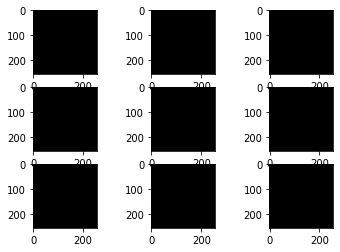

In [ ]:
import matplotlib.pyplot as plt
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# load the image
img = load_img('/content/plants/New_Plant_Diseases_Dataset/train/Pepper_bell___Bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
# prepare iterator
it = datagen.flow(samples, batch_size=32)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = (batch[0]).astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure

# fig1 =plt.gcf()
# fig1.savefig("contoh_normalisasi.png", dpi=100)
# plt.show()
# plt.draw()

print(batch[0])




In [ ]:
# tf.keras.layers.GlobalAveragePooling2D(),
from tensorflow.keras.applications.vgg16 import VGG16
# tf.keras.layers.GlobalAveragePooling2D(),
base_model = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable = False

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 conv2d (Conv2D)             (None, 5, 5, 128)         589952    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 128)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0 

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    try:
      if((logs.get('accuracy')>0.96)&(logs.get('val_loss')<0.150) ):
        print("\n akurasi data training telah mencapai 95% dan loss validation dibawah 0,83")
        self.model.stop_training = True
    except:
      if(logs.get('accuracy')>0.9):
        print("\n akurasi data training telah mencapai 90% ")
        self.model.stop_training = True
callbacks = myCallback()

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=16,
      verbose=1,
      callbacks=[callbacks])

Epoch 1/10
100/100 [==============================] - 1578s 16s/step - loss: 0.3698 - accuracy: 0.8323 - val_loss: 0.1746 - val_accuracy: 0.9238
Epoch 2/10
100/100 [==============================] - 1556s 16s/step - loss: 0.1893 - accuracy: 0.9237 - val_loss: 0.2154 - val_accuracy: 0.9023
Epoch 3/10
100/100 [==============================] - 1563s 16s/step - loss: 0.1444 - accuracy: 0.9406 - val_loss: 0.0855 - val_accuracy: 0.9668
Epoch 4/10
100/100 [==============================] - 1746s 17s/step - loss: 0.1256 - accuracy: 0.9521 - val_loss: 0.1233 - val_accuracy: 0.9570
Epoch 5/10
100/100 [==============================] - ETA: 0s - loss: 0.0845 - accuracy: 0.9700 
 akurasi data training telah mencapai 95% dan loss validation dibawah 0,83
100/100 [==============================] - 1864s 19s/step - loss: 0.0845 - accuracy: 0.9700 - val_loss: 0.0695 - val_accuracy: 0.9746


Text(0.5, 1.0, 'Model Accuracy')

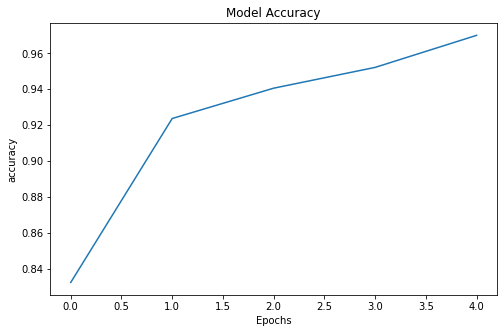

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("Model Accuracy")

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.savefig('tes.png')

NameError: ignored

<Figure size 576x360 with 0 Axes>

Text(0.5, 1.0, 'Model Validation Loss')

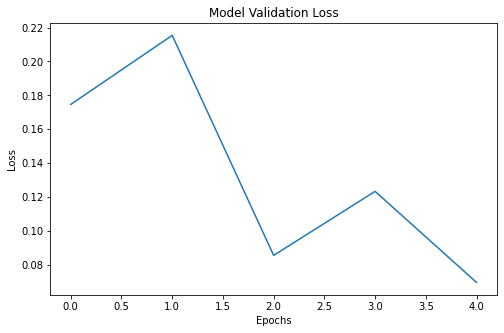

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Validation Loss")

Text(0.5, 1.0, 'Model Validation Accuracy')

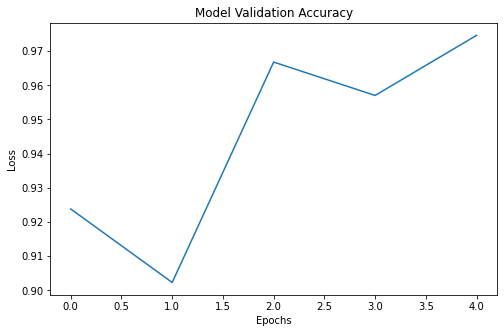

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Validation Accuracy")

Saving PepperBellHealthy9.JPG to PepperBellHealthy9.JPG
PepperBellHealthy9.JPG
Pepper_bell___healthy


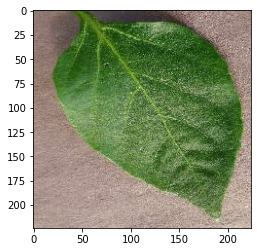

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from keras.models import load_model

model = load_model('/content/CNNVGG16.hdf5')
  
uploaded = files.upload()

  
for fn in uploaded.keys():
  

  path = fn
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  result = np.argmax(classes)
  print(fn)
  if result == 0:
    print('Pepper_bell___Bacterial_spot')
  else:
    print('Pepper_bell___healthy')

Saving loss.png to loss.png
loss.png


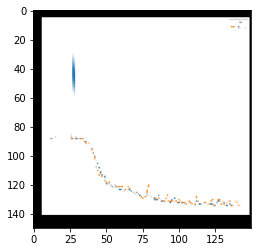

In [ ]:
from keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  print(fn)


In [ ]:
path="CNN.hdf5"
history.model.save(path)


In [ ]:
history.model 


In [ ]:
# model = tf.keras.models.load_model("/content/drive/MyDrive/Datasets_Submisions/model/3/CNNBiasa2.hdf5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp9cto5r06/assets


In [ ]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model("/content/drive/MyDrive/Datasets_Submisions/model/1/Alexalex.hdf5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_quant_model)

INFO:tensorflow:Assets written to: /tmp/tmp9c3bo9ba/assets


INFO:tensorflow:Assets written to: /tmp/tmp9c3bo9ba/assets


In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model("/content/drive/MyDrive/Datasets_Submisions/model/3/CNNBiasa2.hdf5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

with tf.io.gfile.GFile('model3.tflite', 'wb') as f:
  f.write(tflite_quant_model)

INFO:tensorflow:Assets written to: /tmp/tmp6e17bc4_/assets
